# Tarea 2: Clasificacion

### El objetivo de este notebook es aplicar algoritmos de clasificacion para ver como se comportan con un data set de minas, donde el objetivo es diferenciar entre las minas y las rocas.

In [1]:
using DataFrames
using CSV
sonar = CSV.read("C:\\Users\\Julian\\Downloads\\sonar1.txt",DataFrame )


,V1,V2,V3,V4,V5,V6,V7,V8,V9
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109
2,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337
3,0.0262,0.0582,0.1099,0.1083,0.0974,0.228,0.2431,0.3771,0.5598
4,0.01,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598
5,0.0762,0.0666,0.0481,0.0394,0.059,0.0649,0.1209,0.2467,0.3564
6,0.0286,0.0453,0.0277,0.0174,0.0384,0.099,0.1201,0.1833,0.2105
7,0.0317,0.0956,0.1321,0.1408,0.1674,0.171,0.0731,0.1401,0.2083
8,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465
9,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684


### Definimos unas variables de interes y ordenamos el dataframe

In [2]:
sonar1 = sonar[:,61]
sonar2 = sonar[:,1:60]
sonar = [sonar1 sonar2]
#Transformaciones que parecen importantes
sonar.V1 =  (sonar.V2 .* sonar.V1) 
sonar.V2 =  (sonar.V3 .* sonar.V4)
sonar.V3 =  (sonar.V21 .* sonar.V20 .* sonar.V18 .* sonar.V19 .* sonar.V18.^2)
sonar.V4 =  (sonar.V23 .* sonar.V24 .* sonar.V25 .* sonar.V26 .* sonar.V39)
sonar.V18 =  (sonar.V31 .* sonar.V32 .* sonar.V33.^2 .* sonar.V34 .* sonar.V35.^(-2)/30)


208-element Vector{Float64}:
 0.00030808365046430607
 0.002010329505948082
 0.0007506691550062426
 0.012837899937003532
 0.0019863619757288383
 0.010738984460339076
 0.0022878080306403584
 8.008942176411188e-6
 0.001173986052755553
 0.04739202477588303
 0.026052662788328386
 0.0009328018285657613
 8.773726842066157e-5
 ⋮
 0.0008218646650255305
 0.0027515025696320554
 0.005180781124509127
 0.0015550310725802002
 0.0006556681741444841
 0.0010906230589835613
 0.07658463439967768
 0.03947524532290448
 0.12701442618372855
 0.07518473507664064
 0.01224733519111692
 0.001963094497468163

# Regresion logistica

Precision: 0.7636585365853658 con n_test  = 20.0%

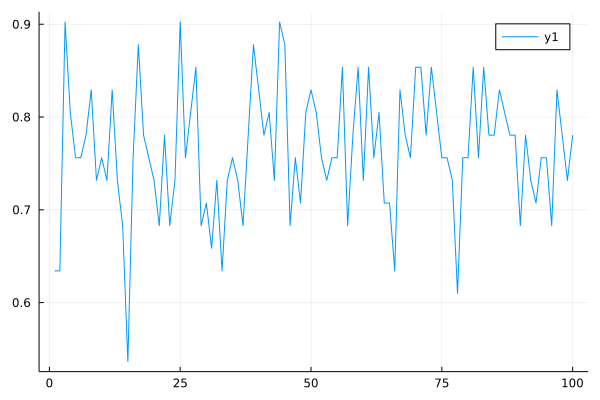

In [3]:
using StatsBase
using GLM
using StatsBase
using Plots
using Random

Random.seed!(1997)
#Vector para guardar los resultados del accuracy por repeticion (100 repeticiones en Total)
precision = zeros(100)

#Tamano de la muestra de prueba
size = 0.2

sonarR = sonar[sonar.x1 .=="R",:]
sonarM = sonar[sonar.x1 .=="M",:]
#Volvemos numerica la categoria
sonarR.x1 = ones(length(sonarR.x1)) 
sonarM.x1 = zeros(length(sonarM.x1)) 


#inicio de ciclo por muestra
for i in 1:100
r1 = rand(length(sonarR.x1))
r2 = rand(length(sonarM.x1))
sonarRTrain = sonarR[ordinalrank(r1).> length(sonarR.x1)*size,:]
sonarMTrain = sonarM[ordinalrank(r2).> length(sonarM.x1)*size,:]
sonarTraining = [sonarRTrain ; sonarMTrain]
sonarRTest = sonarR[ordinalrank(r1).<= length(sonarR.x1)*size,:]
sonarMTest = sonarM[ordinalrank(r2).<= length(sonarM.x1)*size,:]
sonarTest = [sonarRTest ; sonarMTest]
fm = @formula(x1 ~  V1+V2+V3+V4+V18 +V5 + V6+ V7+ V8+ V9+ V10+ V12+ V13+ V14+ V15+ V16+ V22+ V43+ V44+ V45+ V46+ V47+ V48+ V49+ V50+ V52+ V58 )
logit = glm(fm, sonarTraining, Binomial(), ProbitLink())
prediction = predict(logit,sonarTest)
prediction_class = [if x < 0.5 0 else 1 end for x in prediction]
precision[i] = sum(prediction_class .== sonarTest.x1 )/length(sonarTest.x1)
end
print("Precision: " ,mean(precision)," con n_test  = ",size*100, "%")
plot(1:100,precision)

# Regresion

Precision: 0.7578048780487804 con n_test  = 20.0%

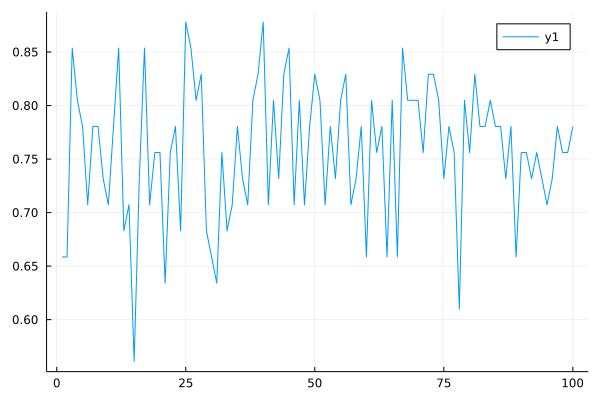

In [4]:
#Vector para guardar los resultados del accuracy por repeticion (100 repeticiones en Total)
precision = zeros(100)

Random.seed!(1997)
#Tamano de la muestra de prueba
size = 0.2

sonarR = sonar[sonar.x1 .=="R",:]
sonarM = sonar[sonar.x1 .=="M",:]
#Volvemos numerica la categoria
sonarR.x1 = ones(length(sonarR.x1)) 
sonarM.x1 = zeros(length(sonarM.x1)) 


#inicio de ciclo por muestra
for i in 1:100
r1 = rand(length(sonarR.x1))
r2 = rand(length(sonarM.x1))
sonarRTrain = sonarR[ordinalrank(r1).> length(sonarR.x1)*size,:]
sonarMTrain = sonarM[ordinalrank(r2).> length(sonarM.x1)*size,:]
sonarTraining = [sonarRTrain ; sonarMTrain]
sonarRTest = sonarR[ordinalrank(r1).<= length(sonarR.x1)*size,:]
sonarMTest = sonarM[ordinalrank(r2).<= length(sonarM.x1)*size,:]
sonarTest = [sonarRTest ; sonarMTest]
fm = @formula(x1 ~  V1+V2+V3+V4+V18 +V5 + V6+ V7+ V8+ V9+ V10+ V12+ V13+ V14+ V15+ V16+ V22+ V43+ V44+ V45+ V46+ V47+ V48+ V49+ V50+ V52+ V58 )
logit = glm(fm, sonarTraining, Normal())
prediction = predict(logit,sonarTest)
prediction_class = [if x < 0.5 0 else 1 end for x in prediction]
precision[i] = sum(prediction_class .== sonarTest.x1 )/length(sonarTest.x1)
end
print("Precision: " ,mean(precision)," con n_test  = ",size*100, "%")
plot(1:100,precision)

# Support vector machine

Precision: 70.95121951219512 con n_test  = 20.0%

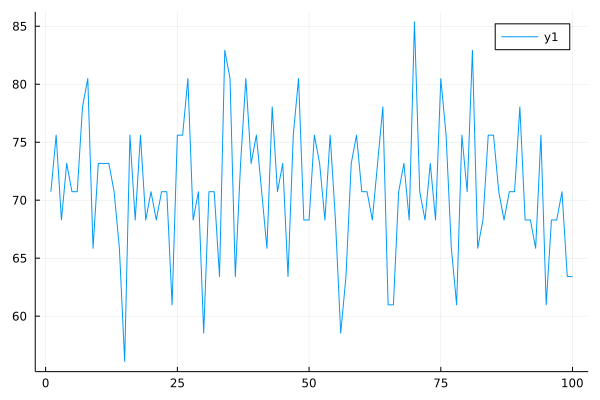

In [5]:
using LIBSVM
using LinearAlgebra
using Printf
#Vector para guardar los resultados del accuracy por repeticion (100 repeticiones en Total)
precision = zeros(100)

Random.seed!(1997)
#Tamano de la muestra de prueba
size = 0.2

sonarR = sonar[sonar.x1 .=="R",:]
sonarM = sonar[sonar.x1 .=="M",:]
#Volvemos numerica la categoria
sonarR.x1 = ones(length(sonarR.x1)) 
sonarM.x1 = zeros(length(sonarM.x1)) 


#inicio de ciclo por muestra
for i in 1:100
r1 = rand(length(sonarR.x1))
r2 = rand(length(sonarM.x1))
sonarRTrain = sonarR[ordinalrank(r1).> length(sonarR.x1)*size,:]
sonarMTrain = sonarM[ordinalrank(r2).> length(sonarM.x1)*size,:]
sonarTraining = [sonarRTrain ; sonarMTrain]
sonarRTest = sonarR[ordinalrank(r1).<= length(sonarR.x1)*size,:]
sonarMTest = sonarM[ordinalrank(r2).<= length(sonarM.x1)*size,:]
sonarTest = [sonarRTest ; sonarMTest]
data = Matrix(sonarTraining)
vars = [2,3,4,18,5,6,7,8,9,10,12,13,14,15,16,22,43,44,45,46,47,48,49,50,52,58]

ytrain = data[:,1]
xtrain = Matrix(transpose(data[:,vars]))
model = svmtrain(xtrain,ytrain)
ŷ, decision_values = svmpredict(model, transpose(Matrix(sonarTest[:,vars])))
# Compute accuracy
precision[i]= mean(ŷ .== sonarTest.x1) * 100
end
print("Precision: " ,mean(precision)," con n_test  = ",size*100, "%")
plot(1:100,precision)

# ID3 Arboles de decision

Precision: 0.7195121951219512 con n_test  = 20.0%

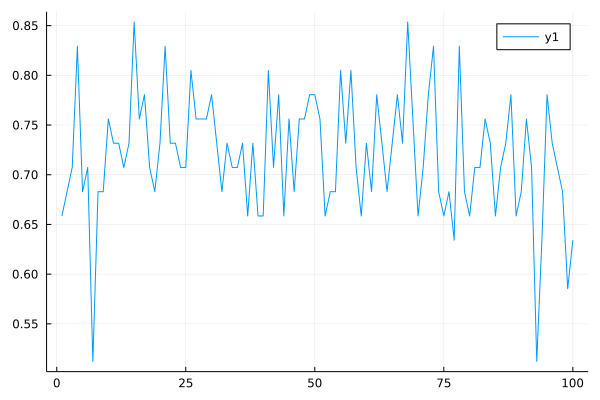

In [6]:
using LIBSVM
using LinearAlgebra
using DecisionTree
#Vector para guardar los resultados del accuracy por repeticion (100 repeticiones en Total)
precision = zeros(100)

Random.seed!(1997)
#Tamano de la muestra de prueba
size = 0.20

sonarR = sonar[sonar.x1 .=="R",:]
sonarM = sonar[sonar.x1 .=="M",:]
#Volvemos numerica la categoria
sonarR.x1 = ones(length(sonarR.x1)) 
sonarM.x1 = zeros(length(sonarM.x1)) 


#inicio de ciclo por muestra
for i in 1:100
r1 = rand(length(sonarR.x1))
r2 = rand(length(sonarM.x1))
sonarRTrain = sonarR[ordinalrank(r1).> length(sonarR.x1)*size,:]
sonarMTrain = sonarM[ordinalrank(r2).> length(sonarM.x1)*size,:]
sonarTraining = [sonarRTrain ; sonarMTrain]
sonarRTest = sonarR[ordinalrank(r1).<= length(sonarR.x1)*size,:]
sonarMTest = sonarM[ordinalrank(r2).<= length(sonarM.x1)*size,:]
sonarTest = [sonarRTest ; sonarMTest]
data = Matrix(sonarTraining)
ytrain = data[:,1]
vars = [2,3,4,18,5,6,7,8,9,10,12,13,14,15,16,22,43,44,45,46,47,48,49,50,52,58]
#vars = 2:61
xtrain = Matrix((data[:,vars]))
model = build_stump(ytrain, xtrain)
preds = apply_tree(model, (Matrix(sonarTest[:,vars])))
prediction_class = [if x < 0.5 0 else 1 end for x in preds]
precision[i] = sum(prediction_class .== sonarTest.x1 )/length(sonarTest.x1)


end
print("Precision: " ,mean(precision)," con n_test  = ",size*100, "%")
plot(1:100,precision)

## finalmente nos damos cuenta que en cuanto a Accuracy promedio, los metodos tienen resultados similares, siendo un poco superior el metodo de regresion logistica.
 ### De hecho se corrio con la misma semillas todos los algoritmos para ver que los picos son generales y transversales a todos los metodos.